# Introduction 

Objective: Describe the purpose of the analysis, which is to understand factors contributing to customer churn. Highlight how statistical methods can reveal significant relationships and help develop retention strategies.

# Loading necessary libraries

In [86]:
import pandas as pd
import numpy as np
import sklearn
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Preparation

In [87]:
data =  pd.read_csv('C:/Users/Akshay/Customer-churn-prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Converting 'TotalCharges' into numeric

In [90]:
non_numeric_values = data[~data['TotalCharges'].str.replace(' ', '').str.isnumeric()]
print(non_numeric_values['TotalCharges'])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 6719, dtype: object


In [91]:
# Replace empty strings or non-numeric values with NaN
data['TotalCharges'] = data['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)


In [92]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Let's look at the missing values 

In [94]:
missing_values = data.isnull().sum()
total_values = data.shape[0]
missing_percentage = (missing_values/ total_values) * 100 

missing_data = pd.DataFrame({
    'Missing_values' : missing_values,
    'missing_percentage' : missing_percentage
})

missing_data = missing_data[missing_data['Missing_values'] > 0].sort_values(by = 'missing_percentage', ascending = False)


missing_data

,Missing_values,missing_percentage
TotalCharges,11,0.156183


## Since we have only missing values in "TotalCharges" colummn, let's look at the distribution of "TotalCharges"

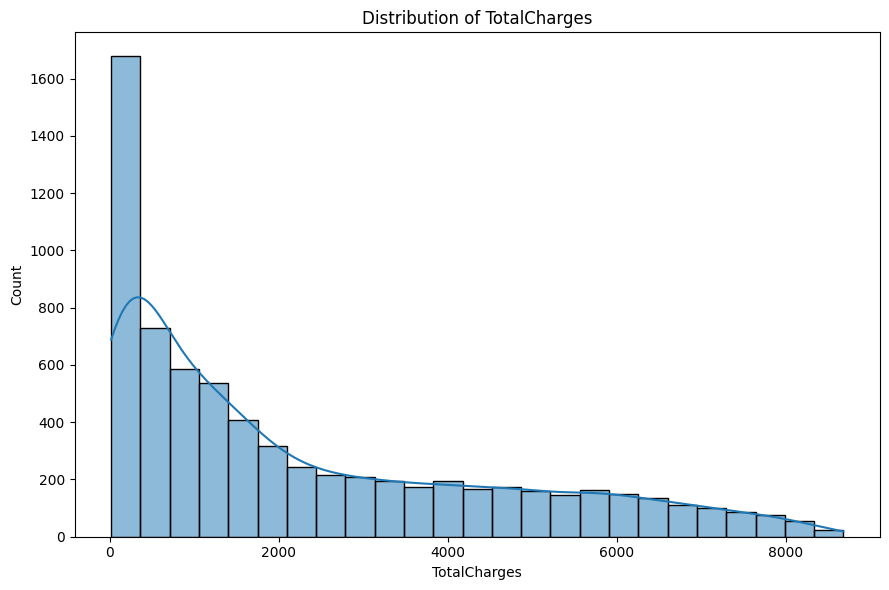

In [95]:
plt.figure(figsize= (9,6))
sns.histplot(data['TotalCharges'], kde =True)
plt.title("Distribution of TotalCharges")

plt.tight_layout()
plt.show()

By looking at the its distribution, it is negatively skewed. Filling it with median makes a good choice as it less susceptible to outliers and skewness 

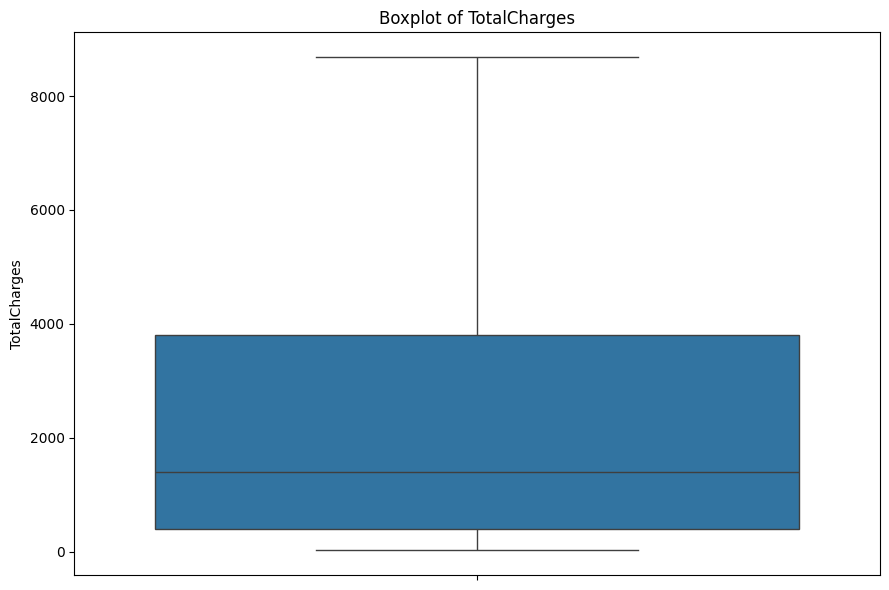

In [96]:
plt.figure(figsize= (9,6))
sns.boxplot(data['TotalCharges'])
plt.title("Boxplot of TotalCharges")

plt.tight_layout()
plt.show()

Looking at the boxplot, there are not many outliers which is good for us !

In [97]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

# Fill the missing-values with the median 

In [98]:
median = data['TotalCharges'].median()
data['TotalCharges'].fillna(median, inplace = True)


C:\Users\Akshay\AppData\Local\Temp\ipykernel_2728\1114622938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(median, inplace = True)


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let's look at the distribution after handling missing values 

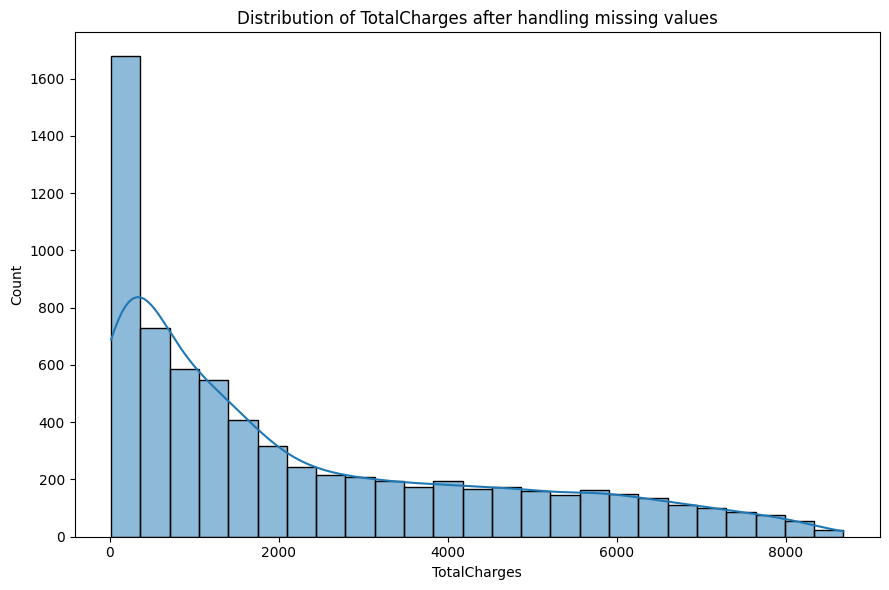

In [100]:
plt.figure(figsize= (9,6))
sns.histplot(data['TotalCharges'], kde = True)
plt.title("Distribution of TotalCharges after handling missing values")

plt.tight_layout()
plt.show()

As there are only 11 missing values in 'TotalCharges', not much difference found compared to previous distribution 

Convert categorical columns with two unique values

In [101]:
def convert_cat_to_binary (df, columns):
    for col in columns:
        if df[col].nunique() == 2:
            df[col] = df[col].map({df[col].unique()[0] : 0,df[col].unique()[1] : 1 })
        
    return df

In [102]:
cat_bool_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines',  'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'PaperlessBilling',  'Churn']

In [103]:
data = convert_cat_to_binary(data, cat_bool_columns)

# Feature selection for the Hypothesis testing 

## Catgeorical features

In [108]:
data_cat = data.select_dtypes(include = 'object')
data_cat.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object')

## Numerical features

In [109]:
data_num = data.select_dtypes(include = 'number')
data_num.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

# Let's start with Hypothesis testing framework

Define Hypotheses:
* if gender affects churn
    * Null Hypothesis (H0) : There is no relationship       between gender and churn
    * Alternative hypotheses (H1) :  There is a relationship between gender and churn 

In [113]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_gender = pd.crosstab(data['gender'], data['Churn'])

# Perform the chi-square test 
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_table_gender)

print(f'Chi_2_gender:{chi2_gender}, p-value_gender:{p_gender}, Degress of freedom_gender: {dof_gender}' )

Chi_2_gender:0.4840828822091383, p-value_gender:0.48657873605618596, Degress of freedom_gender: 1


In this analysis, we aimed to determine whether there is a significant relationship between gender and customer churn. We formulated the following hypotheses:

Null Hypothesis (H0): There is no relationship between gender and churn.
Alternative Hypothesis (H1): There is a relationship between gender and churn.
We conducted a Chi-square test of independence and obtained the following results:

Chi-square Statistic (Chi2): 0.484
p-value: 0.487
Degrees of Freedom: 1
Interpretation: The p-value (0.487) is greater than the common significance level of 0.05. Therefore, we fail to reject the null hypothesis (H0). This indicates that there is not enough evidence to suggest a significant relationship between gender and churn. In conclusion, churn rates do not significantly differ between genders based on our analysis.

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


Test Other Categorical Variables:

* Partner vs. Churn: Investigate whether having a partner affects churn rates.
* Dependents vs. Churn: Check if having dependents influences churn.
* Contract Type vs. Churn: Analyze how the type of contract affects churn.

Define Hypotheses:
* if gender affects churn
    * Null Hypothesis (H0) : There is no relationship       between partner and churn
    * Alternative hypotheses (H1) :  There is a relationship between partner and churn 

In [114]:
contingency_table_partner = pd.crosstab(data['Partner'], data['Churn'])
chi_2_partner, p_partner, dof_partner, expected_partner = chi2_contingency(contingency_table_partner)
print(f'Chi_2_partner:{chi_2_partner}, p-value_partner:{p_partner}, Degress of freedom_partner: {dof_partner}' )


Chi_2_partner:158.7333820309922, p-value_partner:2.1399113440759935e-36, Degress of freedom_partner: 1


Interesting, p is coming out to be very small, which reject our Null hypotheses. This suggests that there is a significant relationship: customers who have partners are likely to churn at different rates compared to those who do not have partners.

Look at the relationship between partner status and churn using bar chart 

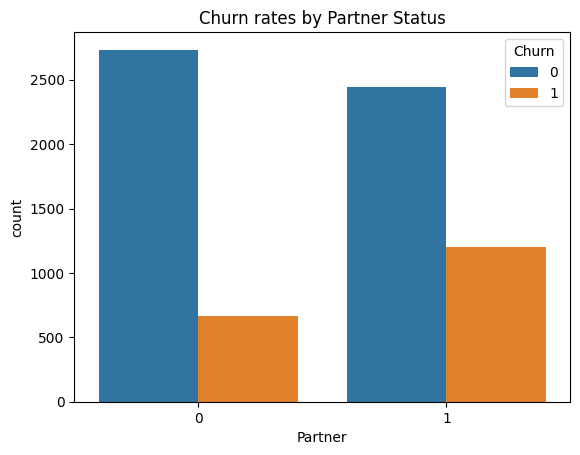

In [116]:
sns.countplot(x = 'Partner', hue = 'Churn', data =  data)
plt.title('Churn rates by Partner Status')
plt.show()

In [85]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64